In [2]:
!pip install xgi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.8/621.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


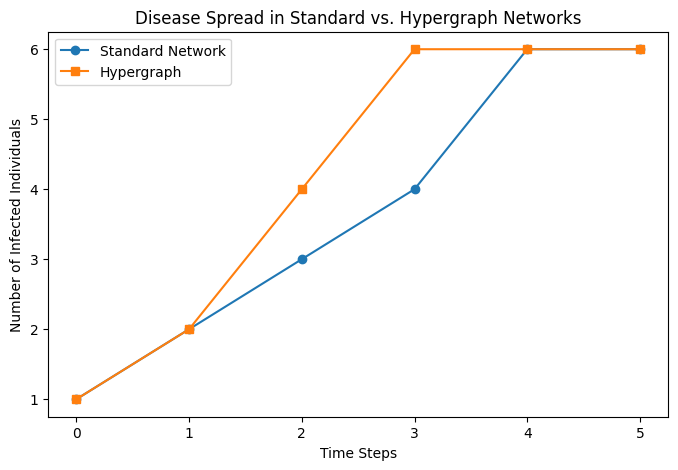

In [4]:
import networkx as nx
import xgi
import random
import matplotlib.pyplot as plt

# Define a function to create a standard graph for comparison
def create_standard_graph():
    G = nx.Graph()
    G.add_edges_from([
        ("A", "B"), ("B", "C"), ("C", "D"), ("D", "E"), ("E", "F"),
        ("A", "C"), ("B", "D"), ("C", "E"), ("D", "F"), ("A", "E")
    ])
    return G

# Define a function to create a hypergraph
def create_hypergraph():
    H = xgi.Hypergraph()
    H.add_edges_from([
        {"A", "B", "C"},  # Group at a bar
        {"C", "D", "E"},  # Group at a restaurant
        {"E", "F", "A"},  # Group at a party
        {"B", "D", "F"},  # Another group
    ])
    return H

# Function to simulate infection spread in a normal graph
def simulate_standard_spread(G, infected_initial, infection_prob, steps):
    infected = set(infected_initial)
    infection_over_time = [len(infected)]

    for _ in range(steps):
        new_infected = set()
        for node in infected:
            for neighbor in G.neighbors(node):
                if neighbor not in infected and random.random() < infection_prob:
                    new_infected.add(neighbor)
        infected.update(new_infected)
        infection_over_time.append(len(infected))

    return infection_over_time

# Function to simulate infection spread in a hypergraph
def simulate_hypergraph_spread(H, infected_initial, infection_prob, steps):
    infected = set(infected_initial)
    infection_over_time = [len(infected)]

    for _ in range(steps):
        new_infected = set()
        for hyperedge in H.edges.members():
            if any(node in infected for node in hyperedge):
                for node in hyperedge:
                    if node not in infected and random.random() < infection_prob:
                        new_infected.add(node)
        infected.update(new_infected)
        infection_over_time.append(len(infected))

    return infection_over_time

# Create networks
standard_graph = create_standard_graph()
hypergraph = create_hypergraph()

# Simulate both models
infection_prob = 0.3
steps = 5
initial_infected = {"A"}

standard_spread = simulate_standard_spread(standard_graph, initial_infected, infection_prob, steps)
hypergraph_spread = simulate_hypergraph_spread(hypergraph, initial_infected, infection_prob, steps)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(range(steps + 1), standard_spread, label="Standard Network", marker='o')
plt.plot(range(steps + 1), hypergraph_spread, label="Hypergraph", marker='s')
plt.xlabel("Time Steps")
plt.ylabel("Number of Infected Individuals")
plt.title("Disease Spread in Standard vs. Hypergraph Networks")
plt.legend()
plt.show()